In [1]:
from astropy.table import Table  
import numpy as np

data_table = Table.read('/home/douglas/Gala-code/correctactions.fits', format = 'fits') 
print(data_table[1].columns)

<TableColumns names=('idx','Jr','Jphi','Jz','Theta_r','Theta_phi','Theta_z','Freq_r','Freq_phi','Freq_z')>


In [2]:
marchetti = Table.read('/home/douglas/data.fits', format = 'fits')
print(marchetti[1].columns)

<TableColumns names=('source_id','ra','dec','parallax','e_parallax','pmra','e_pmra','pmdec','e_pmdec','vrad','e_vrad','GMag','dist','el_dist','eu_dist','rGC','el_rGC','eu_rGC','RGC','el_RGC','eu_RGC','xGC','el_xGC','eu_xGC','yGC','el_yGC','eu_yGC','zGC','el_zGC','eu_zGC','U','el_U','eu_U','V','el_V','eu_V','W','el_W','eu_W','UW','el_UW','eu_UW','vR','el_vR','eu_vR','vtot','el_vtot','eu_vtot','P_ub')>


In [3]:
Jr = np.array(data_table["Jr"][:119629])
Jphi = np.array(data_table["Jphi"][:119629])
Jz = np.array(data_table["Jz"][:119629])
Or = np.array(data_table["Freq_r"][:119629])
Ophi = np.array(data_table["Freq_phi"][:119629])
Oz = np.array(data_table["Freq_z"][:119629])
Tr = np.array(data_table["Theta_r"][:119629])
Tphi = np.array(data_table["Theta_phi"][:119629])
Tz = np.array(data_table["Theta_z"][:119629])
idx = np.array(data_table["idx"][:119629])

In [4]:
X = []
Y = []
Z = []
U = []
V = []
W = []

for i in idx:
    X.append(marchetti["xGC"][i]*0.001)
    Y.append(marchetti["yGC"][i]*0.001)
    Z.append(marchetti["zGC"][i]*0.001)
    U.append(marchetti["U"][i])
    V.append(marchetti["V"][i])
    W.append(marchetti["W"][i])

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)
U = np.array(U)
V = np.array(V)
W = np.array(W)

In [5]:
Vsun = 238 #km/s

kms_to_kpcmyr = 0.00102269032
Vsun = 238*kms_to_kpcmyr

Rcirc = np.abs(Jphi/Vsun)

R = np.sqrt(X**2 + Y**2)

Vr = (X*U + Y*V)/R

print(R-Rcirc)
print(R)
print(Rcirc)

[ 0.78028173 -0.95874621 -1.10514535 ...  0.05381315  0.17378001
 -1.14933842]
[8.062273   8.05686881 8.05921644 ... 7.94799263 7.99644007 8.06788921]
[7.28199127 9.01561502 9.16436179 ... 7.89417948 7.82266005 9.21722763]


Text(0,0.5,'$R\\ -\\ R_{circ}\\ (kpc)$')

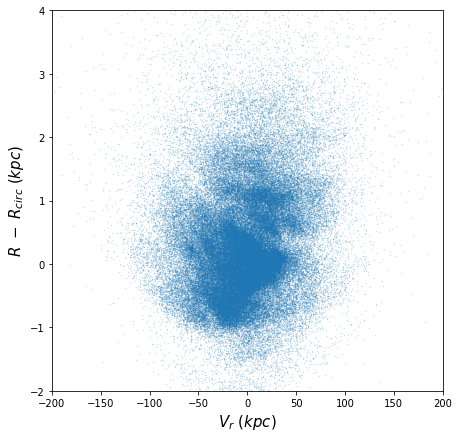

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.scatter(Vr, R-Rcirc, s=0.1, alpha=0.3)
plt.ylim(-2, 4)
plt.xlim(-200,200)
plt.xlabel("$V_r\ (kpc)$",fontsize=15)
plt.ylabel("$R\ -\ R_{circ}\ (kpc)$",fontsize=15)

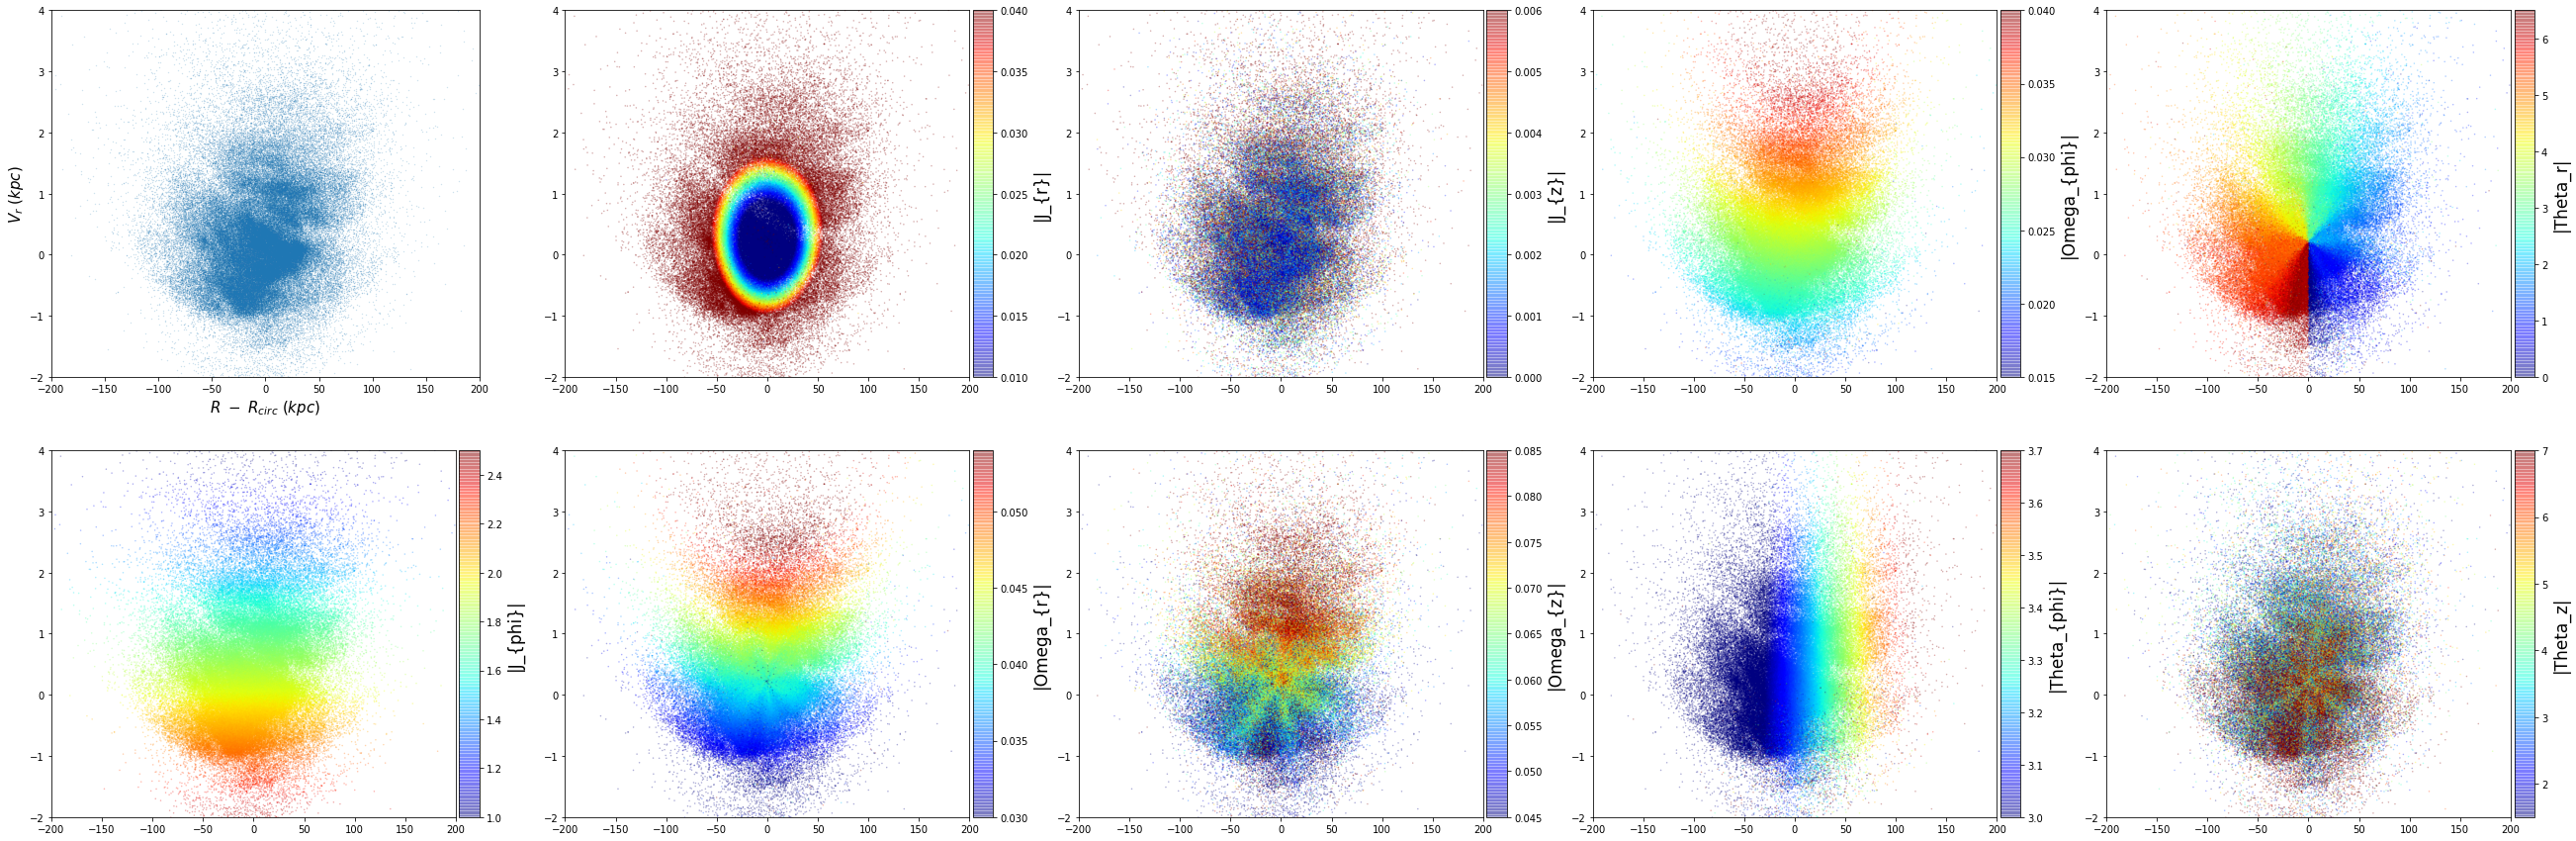

In [28]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,axs = plt.subplots(2,5, figsize=(45,15))

axs[0, 0].scatter(Vr, R-Rcirc, s=0.1, alpha=0.3)
axs[0, 0].axis([-200, 200, -2, 4])
axs[0, 0].set_xlabel("$R\ -\ R_{circ}\ (kpc)$",fontsize=15)
axs[0, 0].set_ylabel("$V_r\ (kpc)$",fontsize=15)

for i in range (0,9):
    if i == 0:
        color = np.abs(Jphi)
        axx = 1
        axy = 0
        vmin= 1
        vmax= 2.5
        label = '|J_{phi}|'
    elif i == 1:
        axx=0
        axy=1
        color = np.abs(Jr)
        vmin = 0.01
        vmax = 0.04
        label = '|J_{r}|'
    elif i == 2:
        color = np.abs(Jz)
        axx = 0
        axy = 2
        vmin= 0
        vmax= 0.006
        label = '|J_{z}|'
    elif i == 3:
        color = np.abs(Or)
        axx = 1
        axy = 1
        vmin= 0.03
        vmax= 0.054
        label = '|Omega_{r}|'
    elif i == 4:
        color = np.abs(Ophi)
        axx = 0
        axy = 3
        vmin= 0.015
        vmax= 0.04
        label = '|Omega_{phi}|'
    elif i == 5:
        color = np.abs(Oz)
        axx = 1
        axy = 2
        vmin= 0.045
        vmax= 0.085
        label = '|Omega_{z}|'
    elif i == 6:
        color = np.abs(Tr)
        axx = 0
        axy = 4
        vmin= 0
        vmax= 6.5
        label = '|Theta_r|'
    elif i == 7:
        color = np.abs(Tphi)
        axx = 1
        axy = 3
        vmin= 3
        vmax= 3.7
        label = '|Theta_{phi}|'
    elif i == 8:
        color = np.abs(Tz)
        vmin= 1.5
        vmax= 7
        axx = 1
        axy = 4
        label = '|Theta_z|'
        
    T = axs[axx,axy].scatter(Vr, R-Rcirc, c = color, cmap ='jet', vmin=vmin, vmax=vmax, s=0.3, alpha=0.3)
    divider = make_axes_locatable(axs[axx,axy])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    bar = plt.colorbar(T, cax=cax)
    bar.set_label(label,size=17)
    axs[axx,axy].axis([-200, 200, -2, 4])